## (Batch/Mini-Batch/Stochastic)

A developed a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [4]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
X.shape

(50,)

In [6]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

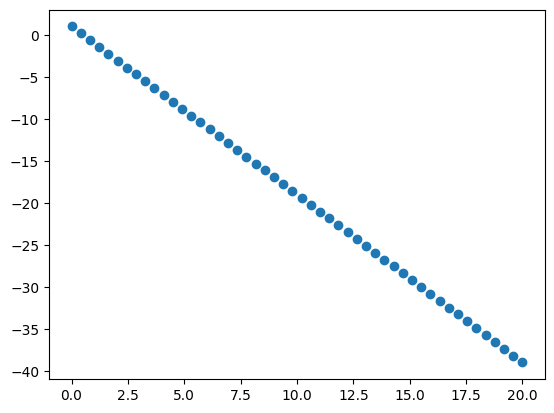

In [7]:
plt.scatter(X,y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [8]:

def GD(x, y, alpha, max_iter):
    i = 0
    theta_0 = 0
    theta_1 = 0
    costList = []
    theta_0_lst = []
    theta_1_lst = []
    m = len(x)

    while i < max_iter:
        h = theta_0 + theta_1 * x

        # Calculate cost function
        cost = (1 / (2 * m)) * np.sum((h - y) ** 2)

        # Calculate theta0
        gradient_0 = np.sum(h - y) / m
        theta_0 = theta_0 - alpha * gradient_0

        # Calculate theta1
        gradient_1 = np.sum((h - y) * x) / m
        theta_1 = theta_1 - alpha * gradient_1

        # Print the desired format every iteration
        if i % 10 == 0:  # Print every 10th iteration
            print(f"Iteration {i}")
            print(f"h(x):\n{h}")
            print(f"Error Vector:\n{y - h}")
            print(f"Cost (j) = {cost}")
            print(f"Gradient Vector:\n{np.array([[gradient_0], [gradient_1]])}")
            print(f"Gradient Vector Norm = {np.linalg.norm([gradient_0, gradient_1])}")
            print(f"theta_0_new : {theta_0}")
            print(f"theta_1_new : {theta_1}")
            print("-" * 50)

        # Stop condition
        if np.sqrt(gradient_0**2 + gradient_1**2) < 0.05:
            break

        i += 1
        costList.append(cost)
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)

    return theta_0_lst, theta_1_lst, h, costList

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [9]:
theta_0_lst, theta_1_lst, h, costList = GD(X, y, 0.0005, 300)

Iteration 0
h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]
Cost (j) = 249.88775510204087
Gradient Vector:
[[ 19.       ]
 [259.3877551]]
Gradient Vector Norm = 260.08269357432516
theta_0_new : -0.0095
theta_1_new

#### Calculate r2 score

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y, h)
print("R2 Score: ", r2)


R2 Score:  0.9977561032305051


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

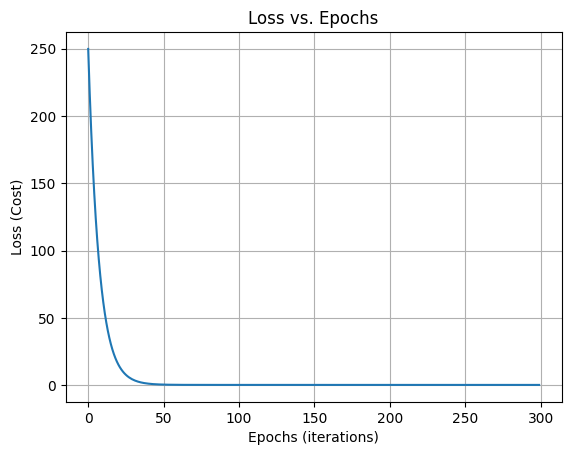

In [11]:
plt.plot(costList)
plt.xlabel('Epochs (iterations)')
plt.ylabel('Loss (Cost)')
plt.title('Loss vs. Epochs')
plt.grid(True)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

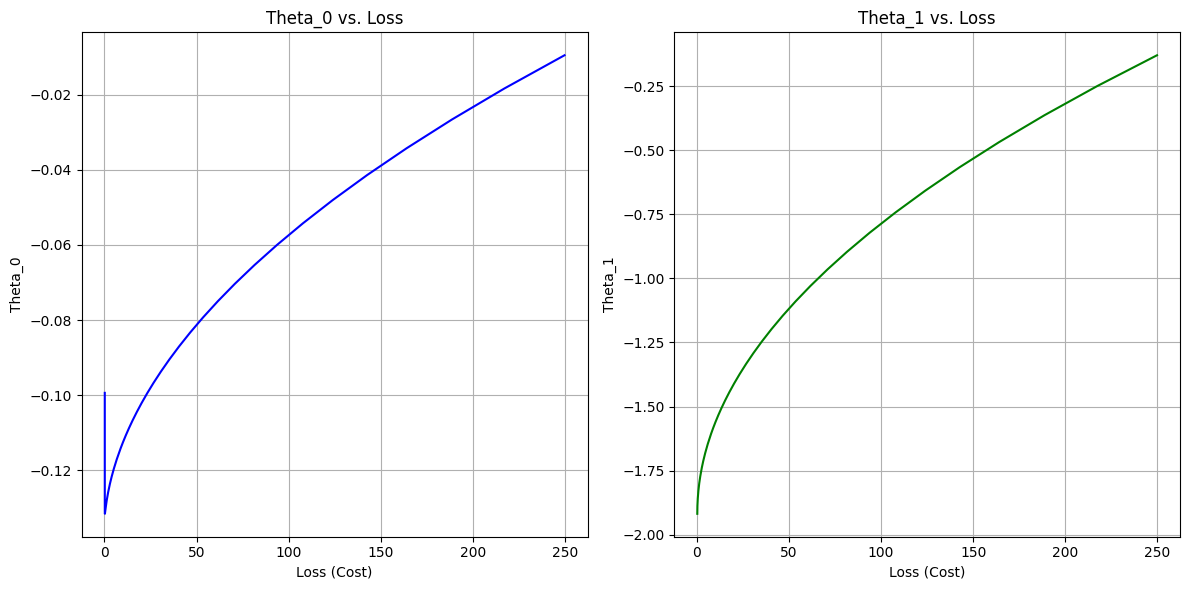

In [12]:


# Plotting Theta_0 vs. Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(costList, theta_0_lst, color='blue')
plt.xlabel('Loss (Cost)')
plt.ylabel('Theta_0')
plt.title('Theta_0 vs. Loss')
plt.grid(True)

# Plotting Theta_1 vs. Loss
plt.subplot(1, 2, 2)
plt.plot(costList, theta_1_lst, color='green')
plt.xlabel('Loss (Cost)')
plt.ylabel('Theta_1')
plt.title('Theta_1 vs. Loss')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Plot all regression lines till converge

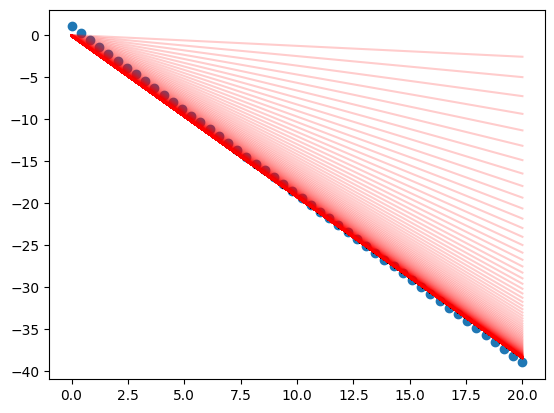

In [13]:
plt.scatter(X,y)
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)

#### Plot the best regression line

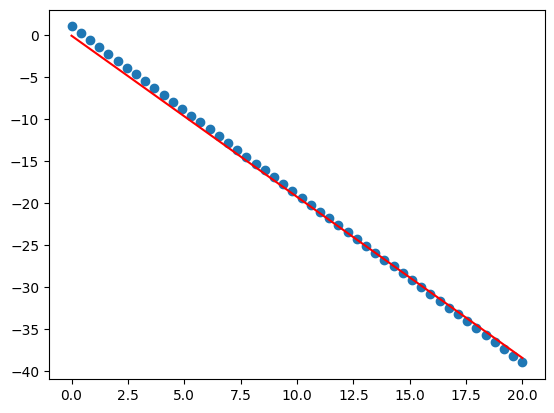

In [14]:
plt.scatter(X,y)
plt.plot(X,y_pred,c="r")
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [15]:
import numpy as np

def GD(x, y, alpha, max_iter):
    i = 0
    theta_0 = 0
    theta_1 = 0
    costList = []
    theta_0_lst = []
    theta_1_lst = []
    gradient_0_lst = []
    gradient_1_lst = []
    m = len(x)

    while i < max_iter:
        h = theta_0 + theta_1 * x

        # Calculate cost function
        cost = (1 / (2 * m)) * np.sum((h - y) ** 2)

        # Calculate theta0
        gradient_0 = np.sum(h - y) / m
        theta_0 = theta_0 - alpha * gradient_0

        # Calculate theta1
        gradient_1 = np.sum((h - y) * x) / m
        theta_1 = theta_1 - alpha * gradient_1

        # Store values for later
        costList.append(cost)
        theta_0_lst.append(theta_0)
        theta_1_lst.append(theta_1)
        gradient_0_lst.append(gradient_0)
        gradient_1_lst.append(gradient_1)

        # Stop condition (if gradients are very small)
        if np.sqrt(gradient_0**2 + gradient_1**2) < 0.05:
            break

        i += 1

    # Return values including gradients
    return theta_0_lst, theta_1_lst, h, gradient_0_lst, gradient_1_lst, costList

# Call the GD function
theta_0_lst, theta_1_lst, h, gradient_0, gradient_1, costList = GD(X, y, 0.0005, 1000)

# Output in the desired format
print(f"h(x):\n{h}")
print(f"\nError Vector:\n{y - h}")
print(f"\nCost (j) = {costList[-1]}")
print(f"\nGradient Vector:\n[{gradient_0[-1]}]\n[{gradient_1[-1]}]")
print(f"\nGradient Vector Norm = {np.linalg.norm([gradient_0[-1], gradient_1[-1]])}")
print(f"\ntheta_0_new : {theta_0_lst[-1]}")
print(f"theta_1_new : {theta_1_lst[-1]}")


h(x):
[-5.22508368e-03 -7.91032206e-01 -1.57683933e+00 -2.36264645e+00
 -3.14845357e+00 -3.93426070e+00 -4.72006782e+00 -5.50587494e+00
 -6.29168206e+00 -7.07748919e+00 -7.86329631e+00 -8.64910343e+00
 -9.43491055e+00 -1.02207177e+01 -1.10065248e+01 -1.17923319e+01
 -1.25781390e+01 -1.33639462e+01 -1.41497533e+01 -1.49355604e+01
 -1.57213675e+01 -1.65071747e+01 -1.72929818e+01 -1.80787889e+01
 -1.88645960e+01 -1.96504031e+01 -2.04362103e+01 -2.12220174e+01
 -2.20078245e+01 -2.27936316e+01 -2.35794388e+01 -2.43652459e+01
 -2.51510530e+01 -2.59368601e+01 -2.67226673e+01 -2.75084744e+01
 -2.82942815e+01 -2.90800886e+01 -2.98658957e+01 -3.06517029e+01
 -3.14375100e+01 -3.22233171e+01 -3.30091242e+01 -3.37949314e+01
 -3.45807385e+01 -3.53665456e+01 -3.61523527e+01 -3.69381598e+01
 -3.77239670e+01 -3.85097741e+01]

Error Vector:
[ 1.00522508  0.97470568  0.94418627  0.91366686  0.88314745  0.85262804
  0.82210864  0.79158923  0.76106982  0.73055041  0.700031    0.6695116
  0.63899219  0.6084

In [16]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9977566779928114

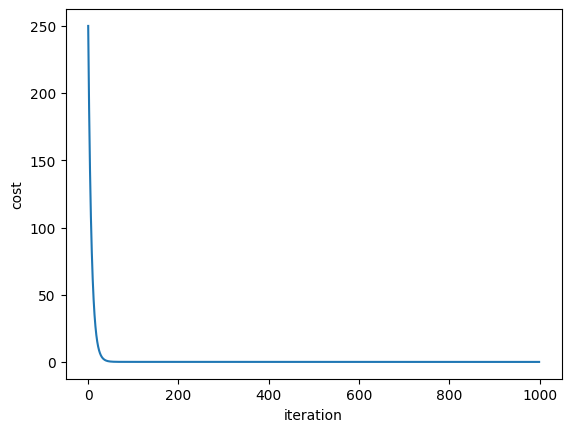

In [17]:
plt.plot(costList)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

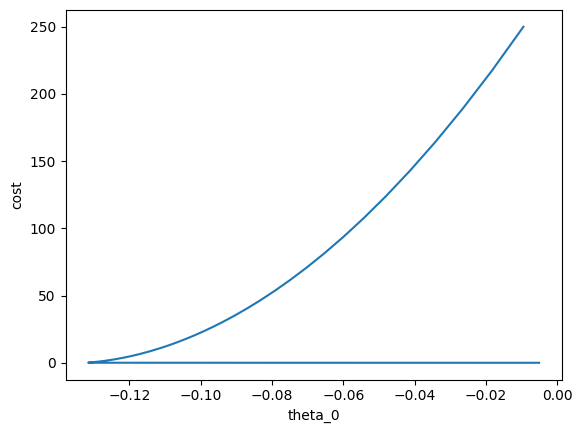

In [18]:
plt.plot(theta_0_lst,costList)
plt.xlabel("theta_0")
plt.ylabel("cost")
plt.show()

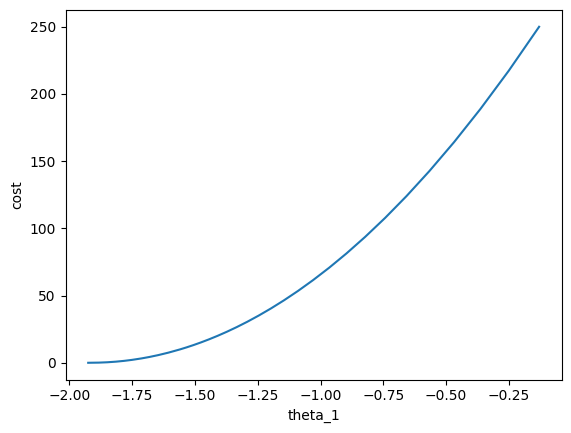

In [19]:
plt.plot(theta_1_lst,costList)
plt.xlabel("theta_1")
plt.ylabel("cost")
plt.show()

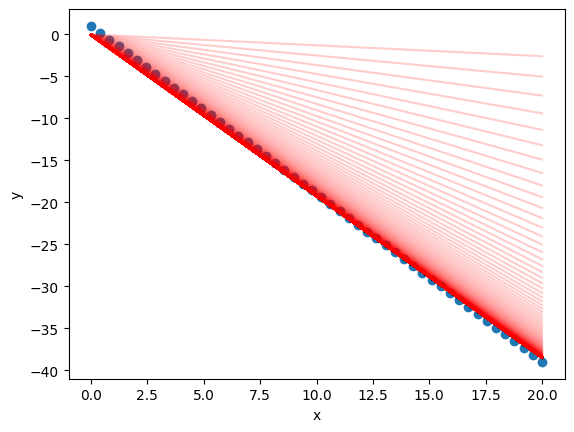

In [20]:
plt.scatter(X,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(len(theta_0_lst)):
    y_pred=theta_0_lst[i] + theta_1_lst[i]*X
    plt.plot(X,y_pred, c="r", alpha = 0.2)

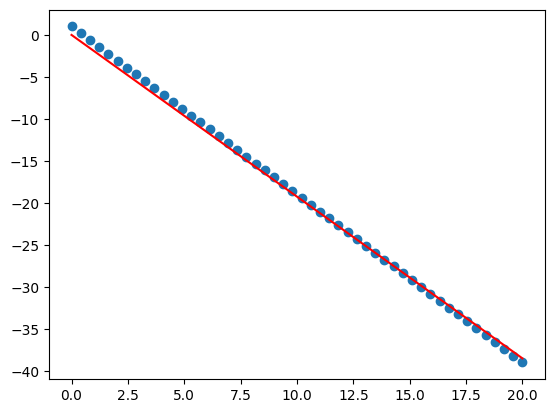

In [21]:
plt.scatter(X,y)
plt.plot(X,y_pred,c="r")
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [22]:
theta_0_lst, theta_1_lst, h, gradient_0, gradient_1, costList = GD(X, y, 0.005, 300)

# Output in the desired format
print(f"h(x):\n{h}")
print(f"\nError Vector:\n{y - h}")
print(f"\nCost (j) = {costList[-1]}")
print(f"\nGradient Vector:\n[{gradient_0[-1]}]\n[{gradient_1[-1]}]")
print(f"\nGradient Vector Norm = {np.linalg.norm([gradient_0[-1], gradient_1[-1]])}")
print(f"\ntheta_0_new : {theta_0_lst[-1]}")
print(f"theta_1_new : {theta_1_lst[-1]}")

h(x):
[  0.22122584  -0.57145651  -1.36413886  -2.1568212   -2.94950355
  -3.7421859   -4.53486824  -5.32755059  -6.12023294  -6.91291529
  -7.70559763  -8.49827998  -9.29096233 -10.08364467 -10.87632702
 -11.66900937 -12.46169171 -13.25437406 -14.04705641 -14.83973876
 -15.6324211  -16.42510345 -17.2177858  -18.01046814 -18.80315049
 -19.59583284 -20.38851518 -21.18119753 -21.97387988 -22.76656223
 -23.55924457 -24.35192692 -25.14460927 -25.93729161 -26.72997396
 -27.52265631 -28.31533865 -29.108021   -29.90070335 -30.6933857
 -31.48606804 -32.27875039 -33.07143274 -33.86411508 -34.65679743
 -35.44947978 -36.24216212 -37.03484447 -37.82752682 -38.62020917]

Error Vector:
[ 0.77877416  0.75512998  0.7314858   0.70784161  0.68419743  0.66055324
  0.63690906  0.61326488  0.58962069  0.56597651  0.54233233  0.51868814
  0.49504396  0.47139978  0.44775559  0.42411141  0.40046722  0.37682304
  0.35317886  0.32953467  0.30589049  0.28224631  0.25860212  0.23495794
  0.21131376  0.18766957  0

In [23]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.998124953356252

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


##### The following results uses alpha = 0.0005 and max. iterations = 300.

##### The following results uses alpha = 0.0001 and max. iterations = 300.

##### The following results uses alpha = 0.00007 and max. iterations = 300.

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [24]:
def Mini_BGD(X, y, alpha, batch_size, max_iterations):
    # Initialization
    theta_0 = 0
    theta_1 = 0
    loss = []
    thetas_0 = []
    thetas_1 = []
    y_preds = []

    # Iterating through epochs
    for epoch in range(max_iterations):
        # Shuffling at the beginning of each epoch
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        start = 0
        end = batch_size
        for i in range(len(X) // batch_size):
            h_x = theta_0 + theta_1 * X[start:end]
            e = h_x - y[start:end]
            cost = np.linalg.norm(e) **2 / (2 * batch_size)
            gradient_vector = (1/batch_size) * e @ np.column_stack((np.ones_like(X[start:end]), X[start:end]))
            gradient_norm = np.linalg.norm(gradient_vector)
            theta_0 = theta_0 - alpha * gradient_vector[0]
            theta_1 = theta_1 - alpha * gradient_vector[1]
        
            y_preds.append(h_x)
            loss.append(cost)
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            start = end
            end = end + batch_size
        if len(loss) > 1 and abs(loss[-1] - loss[-2]) < 0.001 or gradient_norm < 0.001:
            print("\n************ Training Report *************\n")
            print(f"Gradient Descent converged after {epoch + 1} epochs\n")
            print(f"Theta_0_Opt: {theta_0}")
            print(f"Theta_1_Opt: {theta_1}\n")
            print(f"Cost = {loss[-1]}\n")
            break
        print(f"********** Epoch {epoch} **********")
        print(" ")
        print(f"Cost: {loss[-1]}")
        print(f"Gradient Vector: {gradient_vector}\n")
        print(f"Gradient Nomr: {gradient_norm}\n")
        print(f"Theta_0_new: {theta_0}")
        print(f"Theta_1_new: {theta_1}")
        print(" ")
    
    return thetas_0, thetas_1, loss, y_preds, theta_0, theta_1

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [25]:
thetas_0, thetas_1, loss, y_preds, theta_0, theta_1 = Mini_BGD(X,y,alpha=0.0005, batch_size=5, max_iterations=300)

********** Epoch 0 **********
 
Cost: 126.44789838077267
Gradient Vector: [ 15.7208839  234.72318643]

Gradient Nomr: 235.2490604368702

Theta_0_new: -0.07050265513397988
Theta_1_new: -0.9687683258633808
 
********** Epoch 1 **********
 
Cost: 14.216703014488226
Gradient Vector: [ 4.68614884 57.80867523]

Gradient Nomr: 57.998301028806274

Theta_0_new: -0.10424214928164961
Theta_1_new: -1.447727395419294
 
********** Epoch 2 **********
 
Cost: 4.816915170677744
Gradient Vector: [ 2.91777987 38.604758  ]

Gradient Nomr: 38.71486510198104

Theta_0_new: -0.1204491868106946
Theta_1_new: -1.685177820861865
 
********** Epoch 3 **********
 
Cost: 2.0655160660551704
Gradient Vector: [ 1.6237039  28.12767885]

Gradient Nomr: 28.17450500026553

Theta_0_new: -0.127774364687198
Theta_1_new: -1.8021414268081524
 
********** Epoch 4 **********
 
Cost: 0.5777184544255748
Gradient Vector: [ 0.26724048 10.04490906]

Gradient Nomr: 10.048463338319218

Theta_0_new: -0.13062282388403576
Theta_1_new: -1.8

In [28]:
def predict(theta_0, theta_1):
    y_pred = theta_0 + theta_1 * X
    print(f"r2_score: {r2_score(y,y_pred)}")

In [29]:
predict(theta_0, theta_1)

r2_score: 0.9984149635488835


In [32]:
def plot_loss(loss):
    plt.plot(range(len(loss)),loss, 'o-')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [35]:
def plot_theta(thetas, loss):
    plt.plot(thetas, loss,'o-')
    plt.grid()
    plt.xlabel('Loss')
    plt.show()

In [36]:
def plot_regression_lines(thetas_0, thetas_1):
    for th_0, th_1 in zip(thetas_0, thetas_1):
        plt.axline((0,th_0+th_1*0),(20,th_0+th_1*20), color='r')
    plt.axline((0,-2*0+1),(20,-2*20+1),linestyle='--')
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

In [37]:
def plot_best_regression_lines(th_0, th_1):
    plt.axline((0,th_0+th_1*0),(20,th_0+th_1*20), color='r')
    plt.axline((0,-2*0+1),(20,-2*20+1),linestyle='--')
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

In [38]:
def report(theta_0, theta_1, thetas_0, thetas_1, loss):
    predict(theta_0, theta_1)
    plot_loss(loss)
    plt.xlabel('Theta 0')
    plot_theta(thetas_0,loss)
    plt.xlabel('Theta 1')
    plot_theta(thetas_1,loss)
    plot_regression_lines(thetas_0, thetas_1)
    plot_best_regression_lines(theta_0, theta_1)

r2_score: 0.9984149635488835


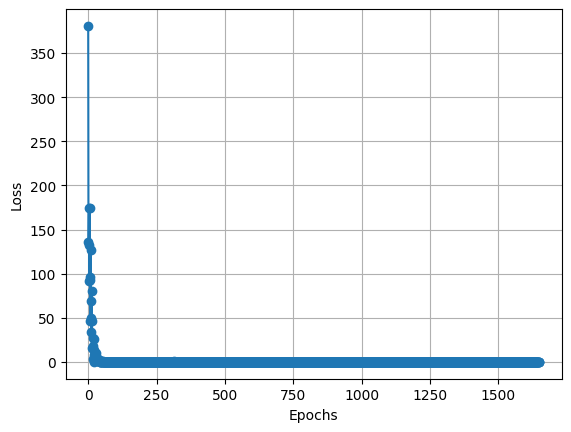

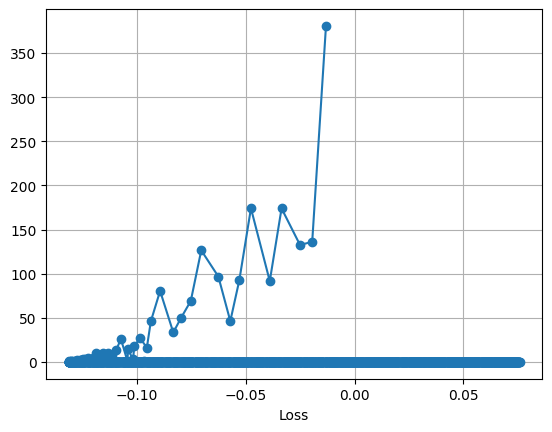

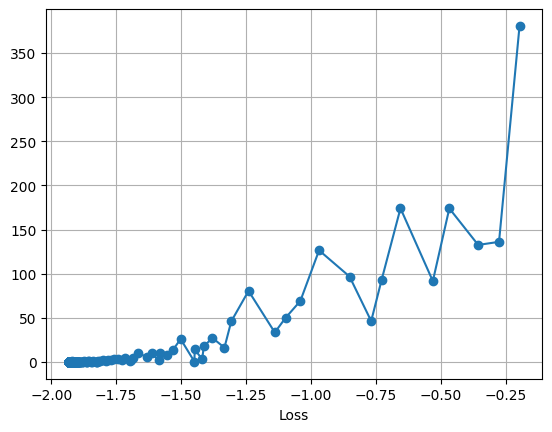

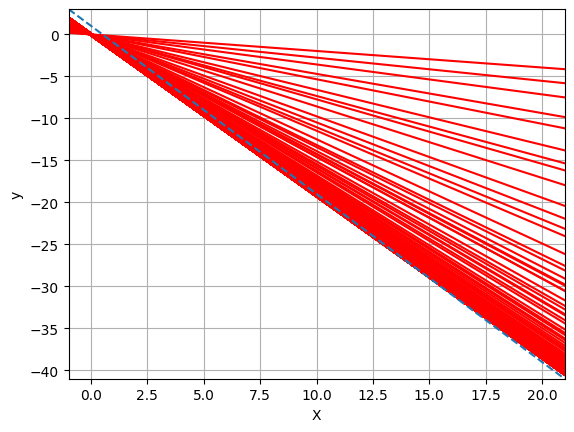

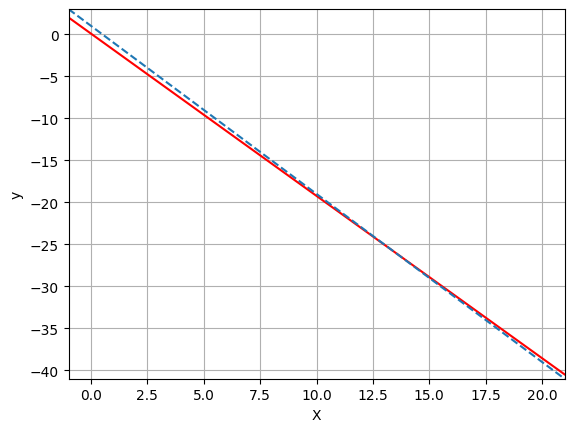

In [39]:
report(theta_0,theta_1,thetas_0,thetas_1,loss)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [41]:
thetas_0, thetas_1, loss, y_preds, theta_0, theta_1 = Mini_BGD(X,y,alpha=0.0005, batch_size=10, max_iterations=300)

********** Epoch 0 **********
 
Cost: 159.72307086456502
Gradient Vector: [ 15.26256163 217.45945379]

Gradient Nomr: 217.9944032109994

Theta_0_new: -0.041516513997738265
Theta_1_new: -0.5671739427256569
 
********** Epoch 1 **********
 
Cost: 52.28865013146547
Gradient Vector: [  8.46391005 104.60666289]

Gradient Nomr: 104.94851925722384

Theta_0_new: -0.0703758666948365
Theta_1_new: -0.9663204380600029
 
********** Epoch 2 **********
 
Cost: 32.97373016063939
Gradient Vector: [ 6.67136118 91.65278595]

Gradient Nomr: 91.89526774108191

Theta_0_new: -0.09044062772989939
Theta_1_new: -1.2471607627229606
 
********** Epoch 3 **********
 
Cost: 13.915401052468741
Gradient Vector: [ 3.89212587 55.12555936]

Gradient Nomr: 55.26278982275329

Theta_0_new: -0.10438986666633326
Theta_1_new: -1.4448629844547678
 
********** Epoch 4 **********
 
Cost: 13.93059184712206
Gradient Vector: [ 4.82984883 73.50682091]

Gradient Nomr: 73.66532535566745

Theta_0_new: -0.11408487537654298
Theta_1_new: 

In [42]:
predict(theta_0, theta_1)

r2_score: 0.9976754150946634


r2_score: 0.9976754150946634


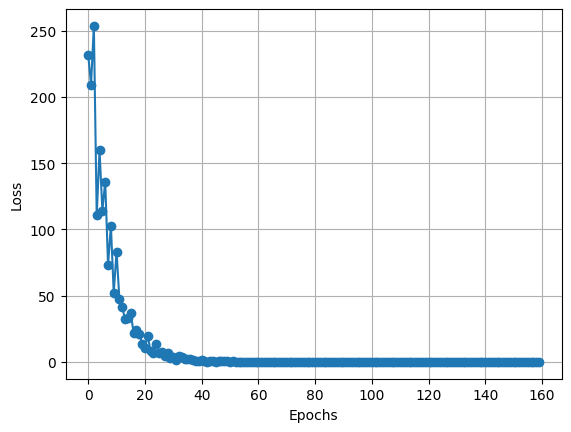

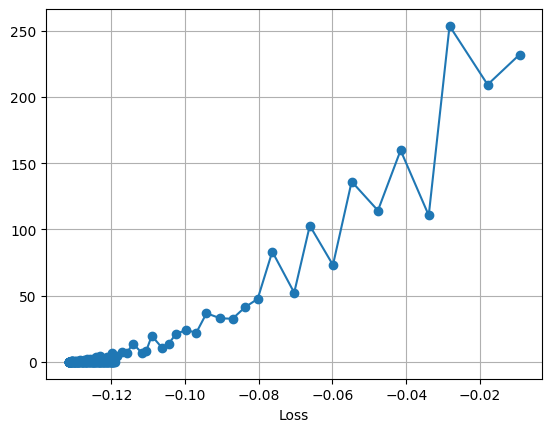

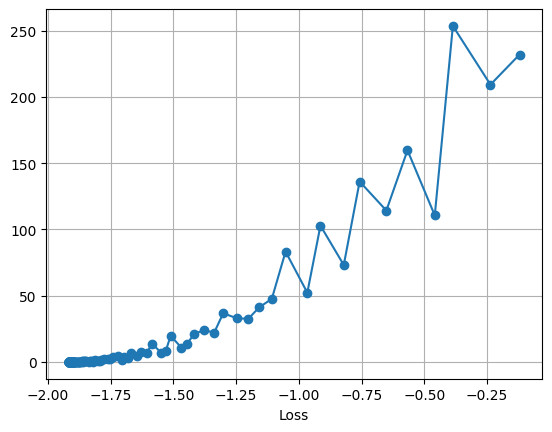

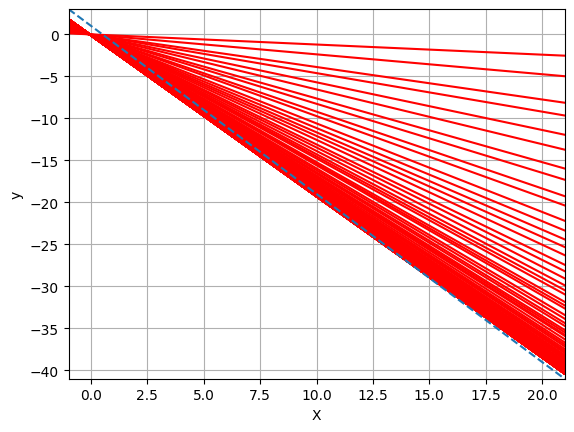

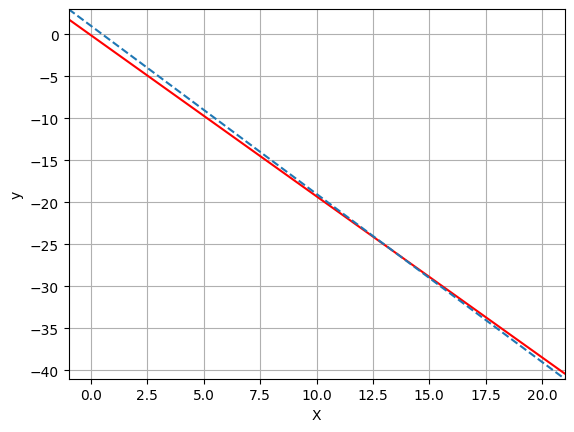

In [43]:
report(theta_0,theta_1,thetas_0,thetas_1,loss)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [44]:
thetas_0, thetas_1, loss, y_preds, theta_0, theta_1 = Mini_BGD(X,y,alpha=0.0005, batch_size=20, max_iterations=300)

********** Epoch 0 **********
 
Cost: 204.33263839597072
Gradient Vector: [ 16.6091361  228.65320992]

Gradient Nomr: 229.25565164336825

Theta_0_new: -0.018151506827512348
Theta_1_new: -0.25370124053024556
 
********** Epoch 1 **********
 
Cost: 162.49507578613483
Gradient Vector: [ 14.90224616 207.96424453]

Gradient Nomr: 208.49749145555347

Theta_0_new: -0.03368249295244038
Theta_1_new: -0.4677234238646599
 
********** Epoch 2 **********
 
Cost: 126.58022878256322
Gradient Vector: [ 13.70659998 189.1066238 ]

Gradient Nomr: 189.60270579965973

Theta_0_new: -0.04858719214106318
Theta_1_new: -0.6803295161388213
 
********** Epoch 3 **********
 
Cost: 74.4171413792059
Gradient Vector: [  9.86387462 130.95539096]

Gradient Nomr: 131.3263509127279

Theta_0_new: -0.06065700427814397
Theta_1_new: -0.8494313663591064
 
********** Epoch 4 **********
 
Cost: 60.28101399364387
Gradient Vector: [  9.1223199  119.00819236]

Gradient Nomr: 119.35730631084607

Theta_0_new: -0.06961884415424897
Th

In [45]:
predict(theta_0, theta_1)

r2_score: 0.997701759906989


r2_score: 0.997701759906989


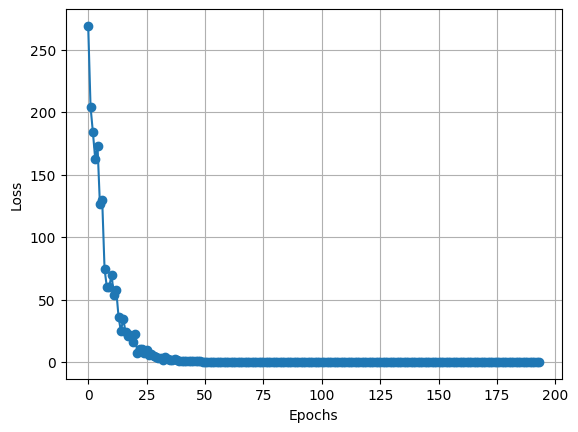

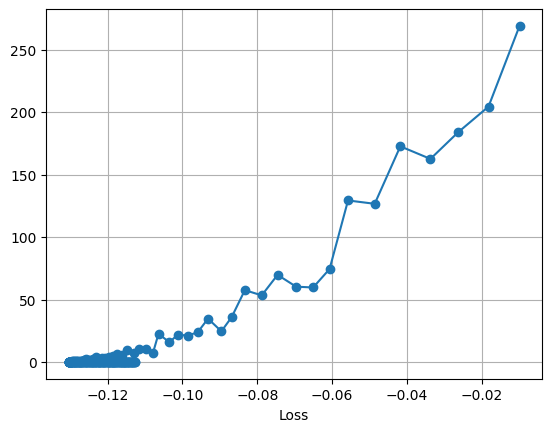

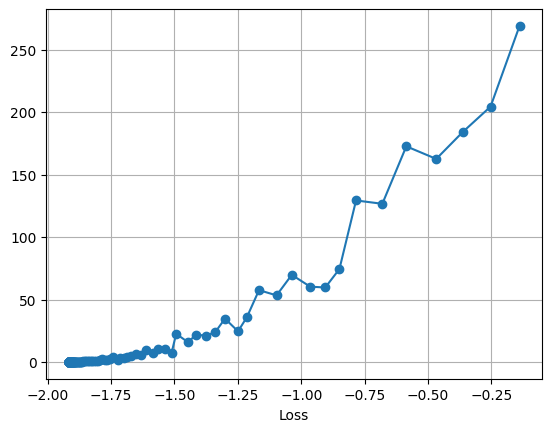

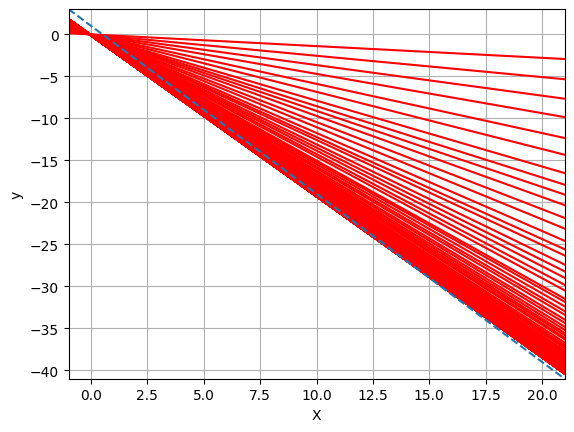

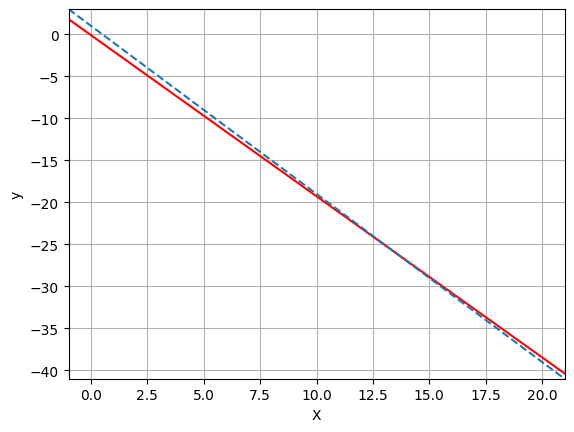

In [46]:
report(theta_0,theta_1,thetas_0,thetas_1,loss)